<h1>Layout of 116 CCD chips on the HSC focal plane</h1>
<h3 style="margin-top:10px; margin-bottom:25px;"><a href="https://ui.adsabs.harvard.edu/abs/2018PASJ...70S...4A/abstract">Aihara et al. 2018</a></h3>
<div style="width:700px; height:525px;"><img style="max-width:100%; max-height:100%;" src="img/aihara2018a.png" alt="Layout of 116 CCD chips on the HSC focal plane"></div>

<h1>HSC CCD Arrangement</h1>
<h3 style="margin-top:10px; margin-bottom:25px;"><a href="https://subarutelescope.org/Observing/Instruments/HSC/ccd.html">https://subarutelescope.org/Observing/Instruments/HSC/ccd.html</a></h3>
<div style="width:700px; height:525px;"><img style="max-width:100%; max-height:100%;" src="img/CCDPosition_20170212.png" alt="HSC CCDs"></div>

<h1>Format of 1 CCD</h1>
<h3 style="margin-top:10px; margin-bottom:25px;"><a href="https://hsc.mtk.nao.ac.jp/pipedoc_5_e/hsc_info_e/index.html">https://hsc.mtk.nao.ac.jp/pipedoc_5_e/hsc_info_e/index.html</a></h3>
<div style="width:700px; height:525px;"><img style="max-width:100%; max-height:100%;" src="img/Formatof1CCD.png" alt="Format of 1 CCD"></div>

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import astropy.io.fits as fits
import esutil
import os.path

import lsst.afw.math as afwMath
import lsst.daf.persistence as dafPersist

In [2]:
# CCD selection
ccd = 43

In [3]:
# butler
butlerVisit = dafPersist.Butler(
    '/datasets/hsc/repo/rerun/private/erykoff/fgcm_pdr1_run1wd/wide_deep2'
)
obsTable = butlerVisit.get(
    'fgcmVisitCatalog'
)
butler = dafPersist.Butler(
    '/datasets/hsc/repo/rerun/private/erykoff/hscproc/runIsrPDR1'
)

In [4]:
# define amps
camera = butler.get('camera')
det = camera[ccd]
amp1, amp2, amp3, amp4 = det.getAmplifiers()

In [5]:
# raw data bounding boxes
abox1 = amp1.getRawDataBBox()
abox2 = amp2.getRawDataBBox()
abox3 = amp3.getRawDataBBox()
abox4 = amp4.getRawDataBBox()

In [6]:
# horizontal overscan bounding boxes
obox1 = amp1.getRawHorizontalOverscanBBox()
obox2 = amp2.getRawHorizontalOverscanBBox()
obox3 = amp3.getRawHorizontalOverscanBBox()
obox4 = amp4.getRawHorizontalOverscanBBox()

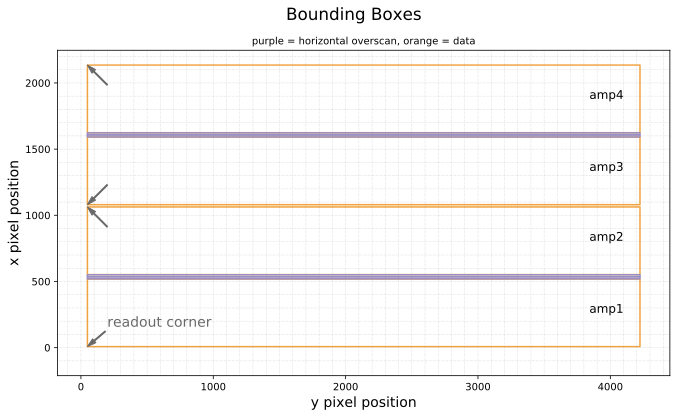

In [7]:
# bounding box plot #1
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.figsize'] = (11,5)
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(111)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
plt.axis('equal')
plt.rcParams.update({'font.size': 14})
plt.suptitle('Bounding Boxes')
plt.title('purple = horizontal overscan, orange = data', fontsize=10)
plt.xlabel('y pixel position', fontsize=14)
plt.ylabel('x pixel position', fontsize=14)
#plt.gca().invert_xaxis()

# corners
allocorners = np.array([obox1.getCorners(), obox2.getCorners(), obox3.getCorners(), obox4.getCorners()])
allacorners = np.array([abox1.getCorners(), abox2.getCorners(), abox3.getCorners(), abox4.getCorners()])
readcorners = (amp1.getReadoutCorner(), amp2.getReadoutCorner(), amp3.getReadoutCorner(), amp4.getReadoutCorner())

# raw data vertices
amplab = []
xreadcorner = []
arrowindent = 150
xreadcornerindent = []
for acorners,readcorner in zip(allacorners,readcorners):
    x = [i[0] for i in acorners]
    y = [i[1] for i in acorners]
    amplab.append(np.mean(x))
    if(str(readcorner)=="ReadoutCorner.LL"):
        xreadcorner.append(np.min(x))
        xreadcornerindent.append(np.min(x)+arrowindent)
    else:
        xreadcorner.append(np.max(x))
        xreadcornerindent.append(np.max(x)-arrowindent)
    x.append(x[0])
    y.append(y[0])
    abbox = plt.plot(y, x, color='#f1a340', label='data')
# overscan vertices
for ocorners in allocorners:
    x = [i[0] for i in ocorners]
    y = [i[1] for i in ocorners]
    x.append(x[0])
    y.append(y[0])
    obbox = plt.plot(y, x, color='#998ec3', label='horiz. overscan')

# readout corners
for x0,y0,x1,y1,lab in zip(xreadcorner,[np.min(y)]*4,xreadcornerindent,
                           [np.min(y)+arrowindent]*4,["readout corner","","",""]):
    plt.annotate(lab, xy=(y0,x0), xytext=(y1,x1), horizontalalignment="left", color="dimgrey", 
                 arrowprops=dict(color='dimgrey', width=1, headwidth=5, headlength=9))

# finish up
for pos,lab in zip(amplab,["amp1","amp2","amp3","amp4"]):
    plt.text(x=4100, y=pos, s=lab, fontsize=12, horizontalalignment="right")
step = 100
left, right = plt.xlim() # switch left and right if x-axis flipped above
bottom, top = plt.ylim()
for yy in range(-step,top.astype(np.int64),step):
    plt.axhline(y=yy, color='grey', linestyle='dotted', alpha=0.5, linewidth=0.5)
for xx in range(-step,right.astype(np.int64),step):
    plt.axvline(x=xx, color='grey', linestyle='dotted', alpha=0.5, linewidth=0.5, ymin=0, ymax=1)
#plt.legend(loc='upper center', fontsize=10, ncol=2)
plt.show()

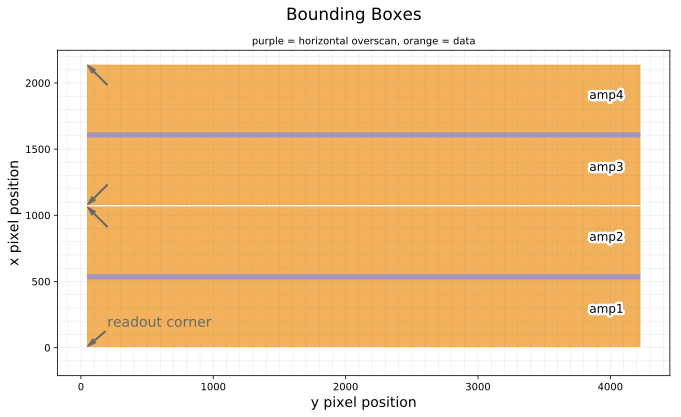

In [8]:
# bounding box plot #2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(111)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
plt.axis('equal')
plt.rcParams.update({'font.size': 14})
plt.suptitle('Bounding Boxes')
plt.title('purple = horizontal overscan, orange = data', fontsize=10)
plt.xlabel('y pixel position', fontsize=14)
plt.ylabel('x pixel position', fontsize=14)
#plt.gca().invert_xaxis()

# corners
allocorners = np.array([obox1.getCorners(), obox2.getCorners(), obox3.getCorners(), obox4.getCorners()])
allacorners = np.array([abox1.getCorners(), abox2.getCorners(), abox3.getCorners(), abox4.getCorners()])
readcorners = (amp1.getReadoutCorner(), amp2.getReadoutCorner(), amp3.getReadoutCorner(), amp4.getReadoutCorner())

# raw data vertices
amplab = []
xreadcorner = []
arrowindent = 150
xreadcornerindent = []
for acorners,readcorner in zip(allacorners,readcorners):
    x = [i[0] for i in acorners]
    y = [i[1] for i in acorners]
    amplab.append(np.mean(x))
    if(str(readcorner)=="ReadoutCorner.LL"):
        xreadcorner.append(np.min(x))
        xreadcornerindent.append(np.min(x)+arrowindent)
    else:
        xreadcorner.append(np.max(x))
        xreadcornerindent.append(np.max(x)-arrowindent)
    plt.fill(y, x, color='#f1a340', alpha=0.85)
# overscan vertices
for ocorners in allocorners:
    x = [i[0] for i in ocorners]
    y = [i[1] for i in ocorners]
    plt.fill(y, x, color='#998ec3', alpha=0.85)

# readout corners
for x0,y0,x1,y1,lab in zip(xreadcorner,[np.min(y)]*4,xreadcornerindent,
                           [np.min(y)+arrowindent]*4,["readout corner","","",""]):
    txt = plt.annotate(lab, xy=(y0,x0), xytext=(y1,x1), horizontalalignment="left", color="dimgrey", 
                 arrowprops=dict(color='dimgrey', width=1, headwidth=5, headlength=9))
    #txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

# finish up
for pos,lab in zip(amplab,["amp1","amp2","amp3","amp4"]):
    txt = plt.text(x=4100, y=pos, s=lab, fontsize=12, horizontalalignment="right")
    txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
step = 100
left, right = plt.xlim() # switch left and right if x-axis flipped above
bottom, top = plt.ylim()
for yy in range(-step,top.astype(np.int64),step):
    plt.axhline(y=yy, color='grey', linestyle='dotted', alpha=0.5, linewidth=0.5)
for xx in range(-step,right.astype(np.int64),step):
    plt.axvline(x=xx, color='grey', linestyle='dotted', alpha=0.5, linewidth=0.5, ymin=0, ymax=1)
plt.show()

In [9]:
# band selection [all|g|r|i|z|y]
band = 'all'

In [10]:
# obsTable data
filtername = [d['filtername'] for d in np.asarray(obsTable)]
if band != 'all': 
    goodfilters = [i for i,s in enumerate(filtername) if band in s]
    filtername = np.asarray(filtername)[goodfilters]
else: 
    goodfilters = range(len(filtername))
visits = obsTable['visit'][goodfilters]
exptime = obsTable['exptime'][goodfilters]
skybackground = obsTable['skybackground'][goodfilters]
ufname,ufcount = np.unique(filtername, return_counts=True)
print('\033[1m')
print('Number of visits:', visits.size)
print('Number of visits by filter:', dict(zip(ufname,ufcount)))
print('Number of pixel rows:', abox1.getHeight())
print('\033[0m')


Number of visits: 5190
Number of visits by filter: {'g': 1030, 'i': 1041, 'r': 925, 'y': 1032, 'z': 1162}
Number of pixel rows: 4176



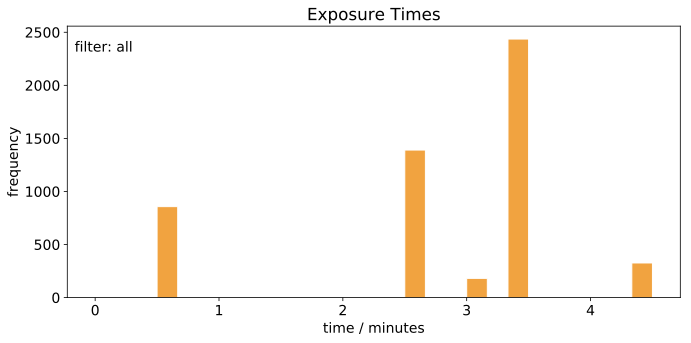

In [11]:
# exposure time hisogram
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (11,5)
plt.rcParams.update({'font.size': 14})
plt.title('Exposure Times')
plt.xlabel('time / minutes', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.xticks(np.arange(0, max(exptime) + 60, 60), np.arange(0, (max(exptime) + 60)/60, 1, dtype='i'))
binwidth = 10
plt.hist(exptime, bins=np.arange(0, max(exptime) + binwidth, binwidth), color='#f1a340', edgecolor='white')
plt.annotate('filter: ' + band, xy=(0.15,0.85), xycoords='figure fraction', ha='center')
plt.show()

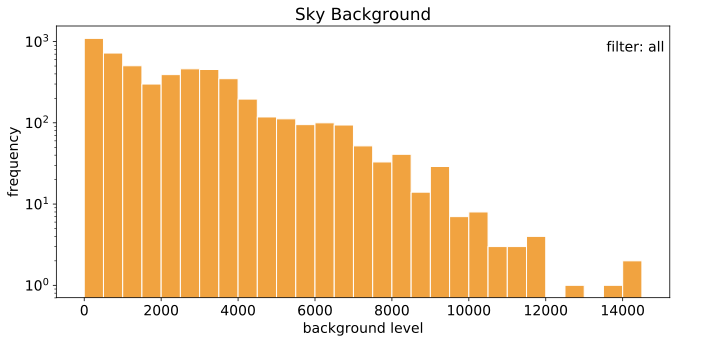

In [12]:
# sky background hisogram
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (11,5)
plt.rcParams.update({'font.size': 14})
plt.title('Sky Background')
plt.xlabel('background level', fontsize=14)
plt.ylabel('frequency', fontsize=14)
#plt.xticks(np.arange(0, max(skybackground) + 60, 60), np.arange(0, (max(skybackground) + 60)/60, 1, dtype='i'))
plt.yscale('log', nonposy='clip')
binwidth = 500
plt.hist(skybackground, bins=np.arange(0, max(skybackground) + binwidth, binwidth), color='#f1a340', edgecolor='white')
plt.annotate('filter: ' + band, xy=(0.9,0.85), xycoords='figure fraction', ha='center')
plt.show()

In [13]:
# catalogue, set up a numpy array, one entry for each visit, containing 9 named fields
cat = np.zeros(visits.size, dtype=[('amp1b', 'i4', (abox1.getHeight(), 5)),
                                   ('amp2a', 'i4', (abox2.getHeight(), 5)),
                                   ('amp3b', 'i4', (abox3.getHeight(), 5)),
                                   ('amp4a', 'i4', (abox4.getHeight(), 5)),
                                   ('overscan1', 'i4', (obox1.getHeight(), 2)),
                                   ('overscan2', 'i4', (obox2.getHeight(), 2)),
                                   ('overscan3', 'i4', (obox3.getHeight(), 2)),
                                   ('overscan4', 'i4', (obox4.getHeight(), 2)),
                                   ('visit', 'i4'),
                                   ('filtername', 'U1'),
                                   ('exptime', 'i4'),
                                   ('skybackground', 'i4')
                                  ])
cat['visit'][:] = visits
cat['filtername'][:] = filtername
cat['exptime'][:] = exptime
cat['skybackground'][:] = skybackground

In [14]:
# temp
fitsout = "test_last5pix_ccd%03d.fits" % (ccd)
if (not os.path.exists(fitsout)):
    
    #for i,v in enumerate(visits):
    for i, v in enumerate(visits[:101]):

        # counter
        if (i % 50) == 0:
            print('On %d of %d' % (i, visits.size))

        # try to use butler to get raw data
        try:
            raw = butler.get('raw', visit=int(visits[i]), ccd=ccd)
        except:
            continue

        # get image/mask/variance map for each data region (converted to int64)
        data1 = raw.maskedImage[abox1].getArrays()[0].astype(np.int64)
        data2 = raw.maskedImage[abox2].getArrays()[0].astype(np.int64)
        data3 = raw.maskedImage[abox3].getArrays()[0].astype(np.int64)
        data4 = raw.maskedImage[abox4].getArrays()[0].astype(np.int64)

        # get image/mask/variance map for each horizontal overscan region (converted to int64)
        overscan1 = raw.maskedImage[obox1].getArrays()[0].astype(np.int64)
        overscan2 = raw.maskedImage[obox2].getArrays()[0].astype(np.int64)
        overscan3 = raw.maskedImage[obox3].getArrays()[0].astype(np.int64)
        overscan4 = raw.maskedImage[obox4].getArrays()[0].astype(np.int64)

        # 
        cat['amp1b'][i, :] = data1[:, -5: ]
        cat['amp2a'][i, :] = data2[:, 0: 5]
        cat['amp3b'][i, :] = data3[:, -5: ]
        cat['amp4a'][i, :] = data4[:, 0: 5]

        cat['overscan1'][i, :, 0] = overscan1[:, 0]
        cat['overscan1'][i, :, 1] = overscan1[:, -1]
        cat['overscan2'][i, :, 0] = overscan2[:, -1]
        cat['overscan2'][i, :, 1] = overscan2[:, 0]
        cat['overscan3'][i, :, 0] = overscan3[:, 0]
        cat['overscan3'][i, :, 1] = overscan3[:, -1]
        cat['overscan4'][i, :, 0] = overscan4[:, -1]
        cat['overscan4'][i, :, 1] = overscan4[:, 0]

    fits.writeto(fitsout, cat, overwrite=True)

On 0 of 5190
On 50 of 5190
On 100 of 5190
